1. visualising,cleaning and processing data
2. Randomforest
3. Neural Network using keras

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

t_data=pd.read_csv("titanic_data.csv")
t_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# visualising,processing and cleaning data

<AxesSubplot:xlabel='Survived', ylabel='count'>

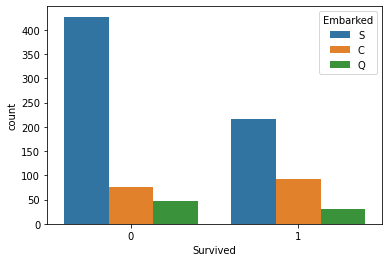

In [22]:
sns.countplot(x="Survived",hue="Embarked", data=t_data)


<AxesSubplot:ylabel='Frequency'>

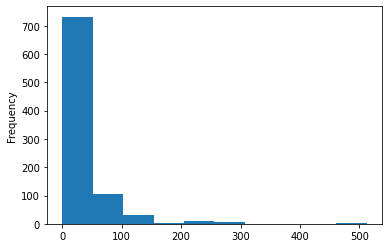

In [24]:
t_data["Fare"].plot.hist()

In [25]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

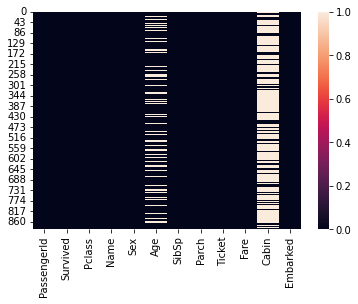

In [26]:
sns.heatmap(t_data.isnull())

In [27]:
t_data.drop("Cabin",axis=1,inplace=True)  
t_data.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [28]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [30]:
t_data.dropna(inplace=True)

In [31]:
# as logistic regression takes only numerical data so we have to convert embarked and sex in to numeric form

Sex=pd.get_dummies(t_data["Sex"], drop_first=True)
Sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
Embarked=pd.get_dummies(t_data["Embarked"],drop_first=True)
Pclass=pd.get_dummies(t_data["Pclass"],drop_first=True)
t_data=pd.concat([t_data,Sex,Embarked,Pclass],axis=1)

In [33]:
t_data.drop(["Embarked","Sex","Pclass","Name","PassengerId","Ticket"],axis=1,inplace=True)
t_data.head(10)



,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [34]:
X=t_data.drop("Survived",axis=1)
Y=t_data["Survived"]

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [36]:
X= StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.1,random_state=1)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### RANDOM FOREST

In [20]:
from sklearn.metrics import roc_curve,auc

### using AUC curve to get best no. of estimator trees

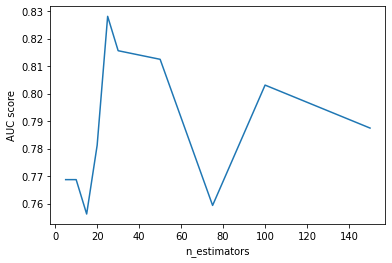

In [314]:
n_estimators=[5,10,15,20,25,30,50,75,100,150]
train_area=[]
test_area=[]
for estimator in n_estimators:
    rf=RandomForestClassifier(n_estimators=estimator)
    rf.fit(x_train,y_train)
    out=rf.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,out) 
    roc_auc=auc(false_positive_rate,true_positive_rate)
    train_area.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line=plt.plot(n_estimators,train_area)
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()


using 40,60,100,120

In [315]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

hyper tuning selected parameters

In [266]:
param_grid={
    'n_estimators':[40,60,100,120],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,4,6],
}

cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
print(cv.best_params_)

{'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}


tried some values for max_depth and 9 is best

In [316]:

rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=4,max_depth=9)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print("train data score: ",accuracy_score(y_train,pred_train))
print("test data score: ",accuracy_score(y_test,pred))



train data score:  0.8796875
test data score:  0.8055555555555556


# neural network model

In [451]:
from keras.layers import Dense, Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

In [452]:
X=t_data.drop("Survived",axis=1)
Y=t_data["Survived"]

In [ ]:
X= MinMaxScaler().fit_transform(X)
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.1,random_state=1)

neural network Model

In [665]:
def neural_model(no_of_neurons,no_of_layers,dropout,activation,learning_rate):
    model=Sequential()
    model.add(Dense(no_of_neurons,input_dim=x_train.shape[1],activation=activation))
    model.add(BatchNormalization())
    for i in range(no_of_layers):
     model.add(Dense(no_of_neurons,activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer= Adam(learning_rate=learning_rate),metrics=["accuracy"])
    return model

accuracy function

In [509]:
def acc_scores(x_train,x_test,y_train,y_test,model):
    predict_train= model.predict(x_train)
    predict=model.predict(x_test)
    predict_train[predict_train>=0.5]=1
    predict_train[predict_train<0.5]=0
    predict[predict>=0.5]=1
    predict[predict<0.5]=0
    print("train data score: ",accuracy_score(y_train,predict_train))
    print("test data score: ",accuracy_score(y_test,predict))
 


graph to see extent of overfitting

In [510]:
def plot_training(training):
    acc_values = training['accuracy']
    val_acc_values = training['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

early stopping for best accuracy

In [660]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint= ModelCheckpoint("model_checkpoint.h5",save_best_only=True)
early_stopping = EarlyStopping( patience=100, restore_best_weights=True)

hypertuning parameters in accordence to neural model build above

In [670]:
test_model=KerasClassifier(build_fn=neural_model)
param_grid={
    'no_of_neurons':[10,20,30,50],
    'no_of_layers':[1,2,3],
    'dropout':[0.3,0.5,0.7],
    "activation":['relu'],
    "learning_rate":[0.003]
}

cv=GridSearchCV(estimator=test_model,param_grid=param_grid,cv=10,n_jobs=-1)
cv.fit(x_train,y_train)
print(cv.best_params_)

20/20 [==============================] - 1s 2ms/step - loss: 0.6286 - accuracy: 0.6938
{'activation': 'relu', 'dropout': 0.5, 'learning_rate': 0.003, 'no_of_layers': 1, 'no_of_neurons': 20}


In [671]:
model=neural_model(no_of_neurons=20,no_of_layers=1,activation='relu',learning_rate=0.003,dropout=0.5)

In [672]:
training_history=model.fit(x_train,y_train,epochs=500,batch_size=50,verbose=0,validation_data=[x_test,y_test],callbacks=[checkpoint,early_stopping])

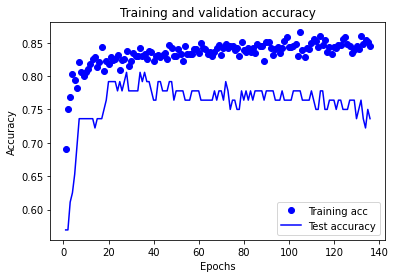

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [673]:
training_info=training_history.history
plot_training(training_info)
training_info.keys()

In [674]:
acc_scores(x_train,x_test,y_train,y_test,model)

3/3 [==============================] - 0s 1ms/step
train data score:  0.8359375
test data score:  0.8055555555555556


conclusion

therefore we can conclude that on small amount of data we need to try building different types of neural sequential model and hypertune its parameters each time for best results but randomforest can be easily build. But overfitting can be reduced to a greater extent in neural sequential models (accuracy a bit less than randomforest) 